In [2]:
!pip install Quandl

In [39]:
import pandas as pd 
import quandl
import time 
import os
import numpy as np
from sklearn.preprocessing import StandardScaler 

import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


In [2]:
auth_key="sw3cHoaYDowNK83CWGHd"

In [3]:
data = quandl.get("EOD/AAPL",authtoken=auth_key)
data


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [7]:
data.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [8]:
data['HL_PCT'] = (data['Adj_High'] - data['Adj_Low']) / data['Adj_Close'] *100.0
data['PCT_change'] =(data['Adj_Close'] - data['Adj_Open']) / data['Adj_Open'] *100.0

In [9]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume', 'HL_PCT',
       'PCT_change'],
      dtype='object')

In [13]:
df=data[['Adj_Close', 'Adj_Volume', 'HL_PCT','PCT_change']]


In [15]:
df.corr()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Close,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.137288,0.512480,1.000000,-0.060349
PCT_change,0.025237,-0.079556,-0.060349,1.000000


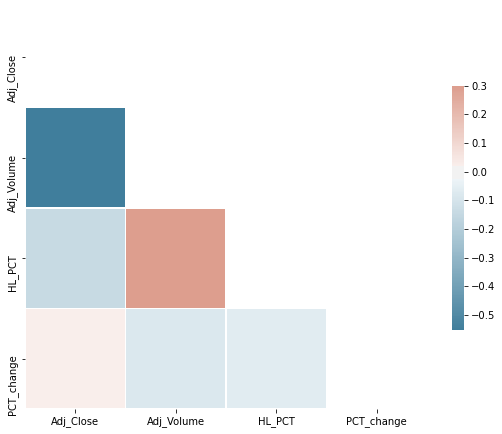

In [25]:
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

f,ax=plt.subplots(figsize=(9, 9))

cmap= sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask ,cmap=cmap, vmax=.3, center = 0, square=True ,linewidths=.5 , cbar_kws={"shrink":.5})

In [29]:
print("Shape of df :",df.shape)

label = df['Adj_Close'].shift(-10)
print("Label having total null" , label.isna().sum())
print("Shape of label",label.shape,"this includes null")

print(df['Adj_Close'])
print(label)

label.dropna(inplace=True)
y=np.array(label)


print("Shape of y after null:" , y.shape)

X = df[['Adj_Volume', 'HL_PCT','PCT_change']]
print ("Shape of Dataset: ",X.shape)

X_lately = X[-10: ]
X= X[:-10]

print("shape of X after removing X_lately :", X.shape)
print("shape of X_ lately:", X_lately.shape)


#--------------------------------------------------------

X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_lately = sc.transform(X_lately)








Shape of df : (1090, 4)
Label having total null 10
Shape of label (1090,) this includes null
Date
2013-09-03    15.476472
2013-09-04    15.796753
2013-09-05    15.688388
2013-09-06    15.781833
2013-09-09    16.033661
                ...    
2017-12-21    42.101646
2017-12-22    42.101646
2017-12-26    41.033528
2017-12-27    41.040745
2017-12-28    41.156217
Name: Adj_Close, Length: 1090, dtype: float64
Date
2013-09-03    14.422914
2013-09-04    14.719406
2013-09-05    14.960780
2013-09-06    14.805882
2013-09-09    15.541726
                ...    
2017-12-21          NaN
2017-12-22          NaN
2017-12-26          NaN
2017-12-27          NaN
2017-12-28          NaN
Name: Adj_Close, Length: 1090, dtype: float64
Shape of y after null: (1080,)
Shape of Dataset:  (1090, 3)
shape of X after removing X_lately : (1080, 3)
shape of X_ lately: (10, 3)


In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_lately = sc.transform(X_lately)

In [37]:

reg=LinearRegression()
model=reg.fit(X_train,y_train)

reg_score=reg.score(X_test , y_test)

print("Estimated Intercept Coefficient :" ,reg.intercept_)
print("Number of Coefficients :" ,len(reg.coef_))

print(reg_score)

Estimated Intercept Coefficient : 26.358990716166698
Number of Coefficients : 3
0.2696621228756254


In [41]:
forecast=[]

forecast = reg.predict(X_lately)
y_pred= reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print("MSE: " ,mse)
print("LinearReg Score: ",reg_score)

print(forecast)


MSE:  34.196350301598535
LinearReg Score:  0.2696621228756254
[30.9031055  31.04394236 31.44336647 30.76707808 31.40221356 31.17356976
 30.4670089  31.14662115 30.58733997 30.82075095]
